In [1]:
#importing the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import warnings
warnings.filterwarnings('ignore')

#The following codes where adopted from the Series Solution of Laplace Problem paper by Lloyd N.Trefethen
#In which they used the Matlab software package.
# The codes were modified to the Python version.

#### Greens function exterior to a disk

In [2]:
# we seek a function u(z) that is zero for |z-c|=r and harmonic 
# outside this circle, including at z=infinity, except with
# u(z)~log|z| as z-> 0. u is expanded as
#
# u(z)= log|z|-log|z - c| + a(1) + sum_{k = 1}^N a(2k)*real((z - c)^k) + a(2k +1)*imag((z - c)^k)

In [3]:
c=complex(3,1)         # center of disk
r=1                    # radius of disk
N=10                # Number of expansion terms
npts=3*N               # sample pts
pt=np.arange(1,npts+1)
z= c+ r*np.exp(2j*np.pi*np.transpose(pt)/npts) # sample points 
rhs=-np.log(abs(z))+np.log(abs(z-c))          # computes the RHS

#creates an overdetermined system (Matrix)
A=np.ones((npts,2*N+1))
for k in range(1,N+1):
    A[:,2*k-1]=((z-c)**(-k)).real
    A[:,2*k]=((z-c)**(-k)).imag
a = np.linalg.lstsq(A,rhs,rcond=-1)[0] # computing the coefficients
print(a)  # prints the coefficients


[-1.15129255e+00 -3.00000000e-01  1.00000000e-01  4.00000000e-02
 -3.00000000e-02 -6.00000000e-03  8.66666667e-03  7.00000000e-04
 -2.40000000e-03  2.40000000e-05  6.32000000e-04 -5.86666667e-05
 -1.56000000e-04  2.84571428e-05  3.50857142e-05 -1.05399997e-05
 -6.71999968e-06  3.40799866e-06  8.55110424e-07 -9.97115058e-07
  7.58407558e-08]


In [4]:
def disk1_fun(z):
    """
    This function computes the value of u at a specified value of z where 
    u(z)= log|z|-log|z - c| + a(1) + sum_{k = 1}^N a(2k)*real((z - c)^k) + a(2k +1)*imag((z - c)^k)
    """
    u=np.log(abs(z))-np.log(abs(z-c)) + a[0]
    for k in range(1,N+1):
        u= np.where(np.abs(z-c)<r, np.nan,u)  # sets u to nan where it is undefined
        u=u+ a[2*k -1]*((z-c)**(-k)).real+a[2*k]*((z-c)**(-k)).imag
    return u  


## code for plotting the Contour plot

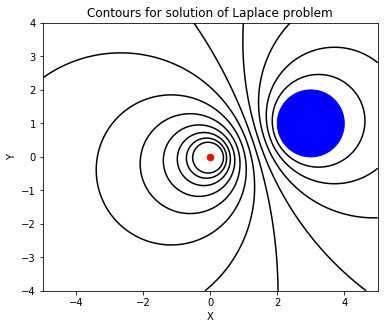

In [5]:
x = np.linspace(-5,5,145);  # range of x points
y = np.linspace(-4,4,115);  # range of y points
[xx,yy] = np.meshgrid(x,y); #  creates x and y points
zz = xx+1j*yy;  # z points
nptss=50
pt=np.arange(-nptss,nptss+1)
z= c+ r*np.exp(1j*np.pi*np.transpose(pt)/nptss) # sample points
uu = disk1_fun(zz) # evalutes the value of the function u at the z points

fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(6, 6))

# fills the real and imaginary of z 
ax1.fill(np.real(z),np.imag(z),color ='b')

b1 = np.arange(-3,0,0.25)       # levels for the contour plot

ax1.set_aspect('equal', adjustable='box')

# Provide a title for the contour plot
ax1.set_title('Contours for solution of Laplace problem')

# Create contour lines or level curves using matplotlib.pyplot module
ax1.contour(xx,yy,uu,levels = b1,colors ='k',linestyles='solid')

ax1.plot(0,0,'.r',markersize=13)

# Set x axis label for the contour plot
plt.xlabel('X')

# Set y axis label for the contour plot
plt.ylabel('Y')

# Saves the contour plot
plt.savefig('series_contour.png')

# Display the contour plot
plt.show()

In [6]:
## code for plotting the surface plot

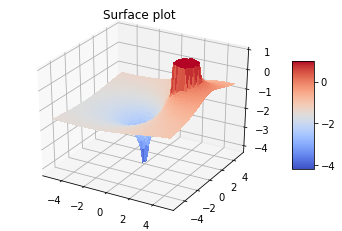

In [7]:
#Code for plotting:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

c=complex(3,1)         # center of disk
r=1                    # radius of disk
N=10                   # Number of expansion terms

# Make data points
m = 50
x_list=np.linspace(-5,5,m)
y_list=np.linspace(-5,5,m)
xx,yy = np.meshgrid(x_list,y_list,sparse=True)
zz = xx+1j*yy
zz = zz.reshape(m*m,1)

npts=len(zz)  # sample points
rhs = -np.log(abs(zz)) + np.log(abs(zz-c))  # computes the RHS

#creates an overdetermined system (Matrix)
AA=np.ones((npts,2*N+1))
for k in range(1,N+1):
    AA[:,2*k-1]=((zz[k]-c)**(-k)).real
    AA[:,2*k]=((zz[k]-c)**(-k)).imag
a=np.matrix(a)    
uu= AA*np.transpose(a)- rhs # computes the value of uu
uu=np.reshape(uu, (m,m))  

zz = np.reshape(zz, (m,m))
uu = np.where(np.abs(zz-c)<r, 1, uu)

fig = plt.figure()
ax = fig.gca(projection='3d')


# Plot the surface.
surf = ax.plot_surface(xx, yy, uu, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

# Provide a title for the surface plot
ax.set_title('Surface plot ')

# Saves the surface plot
plt.savefig('series_surf.png')

# Display the surface plot
plt.show()


In [8]:
## Checking the convergence as n increases

In [9]:
def disk_uz(N,zz):
    """This function take the parameters N which is the number of 
    expansion terms and evalutes u at a specified value zz
    """
    c=complex(3,1)  # center
    r=1             # radius of disk
    # Make the points on the boundary
    npts=3*N   
    pt=np.arange(1,npts+1)
    z= c+ r*np.exp(2j*np.pi*np.transpose(pt)/npts)
    rhs=-np.log(abs(z))+np.log(abs(z-c)) #forms the right hand side
    A=np.ones((npts,2*N+1))
    for k in range(1,N+1):           #forms the matrix  
        A[:,2*k-1]=((z-c)**(-k)).real
        A[:,2*k]=((z-c)**(-k)).imag
    a = np.linalg.lstsq(A,rhs,rcond=-1)[0] # solves for the coefficients
    
    #computing the value of u for a specific value of zz
    u=np.log(abs(zz))-np.log(abs(zz-c)) + a[0]
    for k in range(1,N+1):
        u= np.where(np.abs(zz-c)<r, np.nan,u)
        u=u+ a[2*k -1]*((zz-c)**(-k)).real+a[2*k]*((zz-c)**(-k)).imag
    return u  


In [10]:
disk_uz(20,1)

-1.8054589563221133

In [11]:
## Checking the accuracy for different values of n.

In [12]:
for i in [2,4,6,8,10,12]: # looping over selected values of n
    H=disk_uz(i,1) #  computes the value of u(1) at different values of z
    print(H) # prints the value of u(1)

-1.8069109888037236
-1.8054690503953517
-1.8054590519972622
-1.8054589570998107
-1.805458956321588
-1.80545895632188


In [13]:
## Checking the error for different values of n.

In [14]:
for i in [2,4,6,8,10,12]: # looping over selected values of n
    H=disk_uz(i,1) #  computes the value of u(1) at different values of z
    Error=abs(disk_uz(20,1)-H) #computes the error
    print(Error) # prints the value of the error

0.0014520324816102992
1.0094073238375856e-05
9.567514891450912e-08
7.776974619844168e-10
5.253575352526241e-13
2.333688797762079e-13


In [15]:
##Suppose we take N=20 as the best approximate value(best-case) and take zz = 1

In [16]:
ff=disk_uz(20,1)  # ff denotes the best approximate value of u(1)
ff

-1.8054589563221133

In [17]:
def fun_uu(n):
    'This function computes the value of u(1) at different values of n'
    ut=[]
    for i in range(n):
        u=disk_uz(i,1)
        ut.append(u)
    return(ut)

### plotting the error versus the number of expansion terms


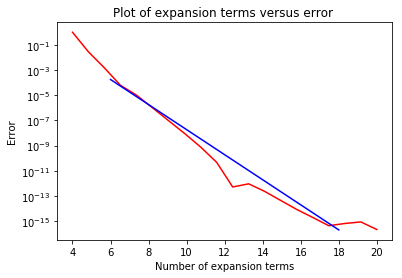

In [18]:
y=fun_uu(20) # List of different values of u(1) for n in range(20)
E=(abs(ff-y)) # Computes the error
x=np.linspace(4,20,20) # range of the number of expansion terms
x_1=np.linspace(6,18,18) # range of values for the linear regression line of best fit
p=np.polyfit(x,np.log(E),1) # computes the coefficients for the linear regression line 

# plots the number of expansion terms against the error and the linear regression line
plt.semilogy(x,E,'r',x_1,np.exp(p[0]*x_1 + p[1]),'b')
# Set x axis label
plt.xlabel('Number of expansion terms') 
# Set y axis label
plt.ylabel('Error')

plt.title('Plot of expansion terms versus error ')
# Saves the plot
plt.savefig('error_uz.png')

# Display the plot
plt.show()


### Green function exterior to several disks

In [19]:
# We seek the function u(z) that is zero for |z-c(j)| = r(j), j = 1,...,J,
# and harmonic outside these circles, including at z=infty, except with
# u(z)~log|z| as z->0. u is expanded as
#
#
#u(z) = log|z| + C + SUM_{j=1}ˆJ {d(j)*log|z-c(j)| 
#  +  SUM_{k=1}ˆN [a(j,k)*real((z-z(j))ˆ-k + b(j,k)*imag((z-z(j))ˆ-k]}
#
# with SUM d(j) = -1; all these coefficients are collected in the vector X.
# The unknowns determined by linear least-squares are C, d(1),...,d(J),
# {a(j,k)}, {b(j,k)}. A has dimensions 1+J*npts by 1+J*(2N+1).


c = np.array([-3, 3j, 3, 2-3j])      # centers
r = np.array([0.7, 0.7, 0.2 ,0.2])   #radii
J = c.size   # number of disks
N = 10   #number of expansion terms

# Make the points on the boundary:
npts = 3*N
pt   = np.arange(1,npts+1);
circ = np.exp(2j*np.pi*pt.conj().transpose()/npts)
z = [];
for j in range (0,J):
    z = np.append(z,c[j]+r[j]*circ.transpose())

# Form the matrix:    
A = np.ones(len(z))  
for j in range(0,J):
    A = np.vstack((A,np.log(abs(z - c[j]))))   # logarithmic terms
    for k in range(1,N+1):                   # set up least-squares matrix
        zck = (z-c[j])**(-k)
        A = np.vstack((A,zck.real,zck.imag))  # algebraic terms
A = A.transpose()

# Append the row for the constraint on the d values:
b = (J)*(2*N+1)+1
Aend = np.zeros((1,b));
Aend[:,1::(2*N+1)]=1
A = np.concatenate((A,Aend),axis=0)

# Form the RHS:
rhs = np.hstack([-np.log(abs(z)),-1])

# Solve:
X = np.linalg.lstsq(A,rhs,rcond=-1)[0]# computing the numpy solution

# Extracting the coefficients 
C=X[0]
print('c =',C)

d=X[1::2*N+1] 

print('d = ',d)

X = np.delete(X, [1,22,43,64]) # removes the coefficients d already extracted from the vector X

a=X[1::2]
b = X[2::2]
print('a=',a)
print('b=',b)


c = -0.17605794048843126
d =  [-0.34297679 -0.31590189 -0.18224794 -0.15887338]
a= [ 1.08043856e-01  1.21712565e-02  1.52809576e-03  1.93791207e-04
  2.47197063e-05  3.22236140e-06  4.36123321e-07  6.15666767e-08
  8.98940026e-09  1.33929200e-09  8.61372402e-03 -1.26245188e-02
 -7.67406052e-05  2.03613969e-04 -3.92640825e-07 -3.23187835e-06
  1.20825194e-08  6.08001346e-08  5.54277537e-12 -1.33842239e-09
 -7.91416887e-03  8.88932957e-05 -9.04014464e-07  8.21726291e-09
 -7.80347609e-11  9.00021377e-13 -1.16764237e-14  3.57353036e-16
  3.38271078e-17  1.38777878e-17 -4.06938450e-03 -1.00580763e-05
  5.15433055e-07 -2.94920776e-09 -1.92679813e-11  2.53529402e-13
 -4.83987850e-16  9.93129190e-17  1.60461922e-17  1.38777878e-17]
b= [ 1.85353519e-02  1.81834030e-03  1.23828208e-04  2.35388781e-06
 -8.60052249e-07 -1.60307067e-07 -1.61274536e-08 -7.74306499e-10
  6.32255092e-11  2.00029602e-11  1.05445692e-01  9.61658242e-04
 -1.61825932e-03 -2.74905282e-06  2.53885513e-05 -9.86616079e-08
 -4

In [20]:
def disksfun(z):
    """
    This function computes the value of u(z) at a specified value of z where 
    u(z) = log|z| + C + SUM_{j=1}ˆJ {d(j)*log|z-c(j)|+  SUM_{k=1}ˆN [a(j,k)*real((z-z(j))ˆ-k 
            + b(j,k)*imag((z-z(j))ˆ-k]}
    """
    u = np.log(abs(z)) + C  # computes the first two terms of the expansion for u(z)
    for j in range(0,J):
        cj = c[j]; 
        u = u + d[j]*np.log(abs(z-cj));
        for k in range(0,N):
            u= np.where(np.abs(z-cj)<=r[j], np.nan,u)  # sets the function u to nan where it is not defined
            zck = (z-cj)**(-k-1); 
            kk = k+(j)*N;
            u = u+a[kk]*np.real(zck)+b[kk]*np.imag(zck); # computes the final value of the function u(z) 
    return u

### code for plotting the Contour plot for several disks

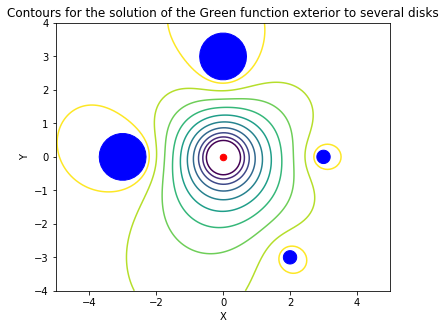

In [21]:
x = np.linspace(-5,5,145) # range of x points
y = np.linspace(-4,4,115) # range of y points
[xx,yy] = np.meshgrid(x,y)  #  creates x and y points
zz = xx+1j*yy   # zz points
pt   = np.arange(0,31);
z = np.exp(2j*np.pi*pt.conj().transpose()/30) # sample points on the boundary

uu = disksfun(zz)  # evalutes the value of the function uu at the zz points
fig, (ax1) = plt.subplots(1, 1, sharex=True, figsize=(6, 6))

for j in range(0,J):
    disk = c[j]+r[j]*z
    ax1.fill(np.real(disk),np.imag(disk),color ='b')   # fills the real and imaginary of z
    
b2 = np.arange(-1.9,0.1,0.2)     # levels for the contour plot    
    
# Create contour lines or level curves using matplotlib.pyplot module    
ax1.contour(xx,yy,uu,levels = b2)

ax1.set_aspect('equal', adjustable='box')


# Provide a title for the contour plot
ax1.set_title('Contours for the solution of the Green function exterior to several disks')


ax1.plot(0,0,'.r',markersize=13)

# Set x axis label for the contour plot
plt.xlabel('X')


# Set y axis label for the contour plot
plt.ylabel('Y')

# Saves the contour plot

plt.savefig('several_disks.png')

# Display the contour plot
plt.show()